In [1]:
import os, sklearn, pandas, numpy as np
from sklearn import svm
import skimage
from skimage import io, filters
from utils import utils # custom functions, in local environment
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# custom scripts
import config # params, constants
import data # functions that mutate outr data

 Dataset :: namedtuple(
    ['train' = ['img_name']
    , 'test' = ['img_name']
    , 'labels' = pandas.df('img_name','breed')
    , 'dict_index_to_label' = dict to convert label_index -> label_name
    , 'dict_label_to_index'= dict to convert label_name -> label_index
    


# Prepare dataset

In [3]:
# labels = pandas.read_csv('../datasets/labels.csv')
# dataset = data.Dataset(config.dataset_dir, label_name='breed')

# dataset.train is just a list of image names, not te actual data
dataset = data.init_dataset()
labels = dataset.labels
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,f75b457706d15d23fb803e2ad7c66c40,scottish_deerhound
freq,1,126


In [4]:
# create a label dicts to convert labels to numerical data and vice versa
# the order is arbitrary, as long as we can convert them back to the original classnames
unique_labels = set(labels['breed'])
dict_index_to_label = data.dict_index_to_label(unique_labels)
dict_label_to_index = data.dict_label_to_index(unique_labels)
dict_label_to_index

{'affenpinscher': 119,
 'afghan_hound': 20,
 'african_hunting_dog': 61,
 'airedale': 41,
 'american_staffordshire_terrier': 58,
 'appenzeller': 95,
 'australian_terrier': 87,
 'basenji': 117,
 'basset': 73,
 'beagle': 59,
 'bedlington_terrier': 100,
 'bernese_mountain_dog': 72,
 'black-and-tan_coonhound': 6,
 'blenheim_spaniel': 18,
 'bloodhound': 12,
 'bluetick': 23,
 'border_collie': 48,
 'border_terrier': 94,
 'borzoi': 33,
 'boston_bull': 2,
 'bouvier_des_flandres': 52,
 'boxer': 49,
 'brabancon_griffon': 27,
 'briard': 11,
 'brittany_spaniel': 102,
 'bull_mastiff': 118,
 'cairn': 112,
 'cardigan': 29,
 'chesapeake_bay_retriever': 83,
 'chihuahua': 85,
 'chow': 69,
 'clumber': 97,
 'cocker_spaniel': 62,
 'collie': 8,
 'curly-coated_retriever': 66,
 'dandie_dinmont': 98,
 'dhole': 114,
 'dingo': 109,
 'doberman': 107,
 'english_foxhound': 15,
 'english_setter': 19,
 'english_springer': 79,
 'entlebucher': 96,
 'eskimo_dog': 0,
 'flat-coated_retriever': 91,
 'french_bulldog': 35,
 'g

In [5]:
dict_label_to_index['beagle']

59

In [6]:
# access a specific value
sample_id = 'ff63fa05a58473138848f80840064d23'
breed = labels.loc[labels['id'] == sample_id]
print(breed['breed'].item())
breed

affenpinscher


,id,breed
10197,ff63fa05a58473138848f80840064d23,affenpinscher


len(img_list) 10222
(375, 500, 3) 562500 uint8


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


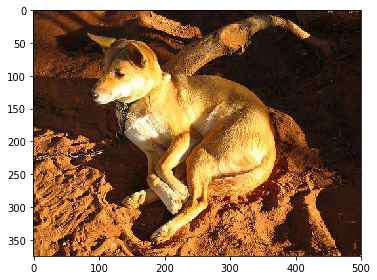

In [7]:
# Import train+test data
img_dir = config.dataset_dir + 'train/'
img_list = dataset.train # ignore the test images for now
print('len(img_list)',len(img_list))
img_name = img_list[1]
img = data.read_img('train/',img_name)
# all imgs should be equally sized # TODO function to crop photos?
dimensions = img.shape
print(img.shape, img.size, img.dtype)
io.imshow(img)

# Import test data

In [8]:
# Collect test data (+labels)
# ignore images that have different dimensions
# extract_data :: Dataset -> Bool -> ([np.array (flattened)], [label])
train_data, train_labels = data.extract_data(dataset,dataset.train[0:300],dimensions,verbose=True)
print(len(train_data),len(train_labels))

extract data: 300
reading file: ../datasets/train/000bec180eb18c7604dcecc8fe0dba07.jpg
reading file: ../datasets/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg
reading file: ../datasets/train/001cdf01b096e06d78e9e5112d419397.jpg
reading file: ../datasets/train/00214f311d5d2247d5dfe4fe24b2303d.jpg
reading file: ../datasets/train/0021f9ceb3235effd7fcde7f7538ed62.jpg
reading file: ../datasets/train/002211c81b498ef88e1b40b9abf84e1d.jpg
reading file: ../datasets/train/00290d3e1fdd27226ba27a8ce248ce85.jpg
reading file: ../datasets/train/002a283a315af96eaea0e28e7163b21b.jpg
reading file: ../datasets/train/003df8b8a8b05244b1d920bb6cf451f9.jpg
reading file: ../datasets/train/0042188c895a2f14ef64a918ed9c7b64.jpg
reading file: ../datasets/train/004396df1acd0f1247b740ca2b14616e.jpg
reading file: ../datasets/train/0067dc3eab0b3c3ef0439477624d85d6.jpg
reading file: ../datasets/train/00693b8bc2470375cc744a6391d397ec.jpg
reading file: ../datasets/train/006cc3ddb9dc1bd827479569fcdc52dc.jpg
reading file: ..

reading file: ../datasets/train/02e7b5a86cec57f5935374946d4f5dc1.jpg
reading file: ../datasets/train/02eef0f899b81ddf27a42641bc8db9ee.jpg
reading file: ../datasets/train/02ef5f19db8cf4da62016a1067bdc548.jpg
reading file: ../datasets/train/02f07e7e51662336a9d8c775a4eac5f4.jpg
reading file: ../datasets/train/02f3d5fd1eea0a2e6f4742bc54b51ba9.jpg
reading file: ../datasets/train/02f6152a9401568d695234d33bb6c37d.jpg
reading file: ../datasets/train/02ff77af410e966b7b661f6f0789d947.jpg
reading file: ../datasets/train/0310a425f26d797634aadeb66bd63ef1.jpg
reading file: ../datasets/train/0311a6a51a414ba91f3ad8055170baa1.jpg
reading file: ../datasets/train/0314048edbd08c8c50eb3c93281bd043.jpg
reading file: ../datasets/train/031d3353588a81b42bcae74ff19571b0.jpg
reading file: ../datasets/train/0325e6ba5b6afd3e0dd94c3a77b6de59.jpg
reading file: ../datasets/train/032620ae0f847d957d94d1fd76cb17e8.jpg
reading file: ../datasets/train/0326344e0d5181130c28d25edd5627e4.jpg
reading file: ../datasets/train/03

reading file: ../datasets/train/06538c8ad646eb2ebbbbdda1c8174899.jpg
reading file: ../datasets/train/0653d31ae648e2a6628ee3f440729361.jpg
reading file: ../datasets/train/065452ccfffdc6b6f60183bd6c88ba89.jpg
reading file: ../datasets/train/06557d54077c5265ecdcd7273c9c38ca.jpg
reading file: ../datasets/train/0672592809da7574a87ddcd0ba2f315d.jpg
reading file: ../datasets/train/0672befac9ea0c8fe82c37b5a634d87c.jpg
reading file: ../datasets/train/068314c65cbe67fa4f57283f4f3a801c.jpg
reading file: ../datasets/train/0685bcc6cdaa954771379d95d339baf6.jpg
reading file: ../datasets/train/06ab2182c2a958a5f0de2035f39a0fa7.jpg
reading file: ../datasets/train/06ba5a21442ba19190bfe7bfa9def11c.jpg
reading file: ../datasets/train/06bd6a364e68b886c085b9b8b8d2b818.jpg
reading file: ../datasets/train/06c47d61293f2bb51a94040bb4b20799.jpg
reading file: ../datasets/train/06c4dbc5b0ea3674bbc752c4ce76819a.jpg
reading file: ../datasets/train/06cceae049531cdb98fe67d912aa58a8.jpg
reading file: ../datasets/train/06

In [9]:
a = config.dataset_dir + 'train/' + img_list[0]
a

'../datasets/train/000bec180eb18c7604dcecc8fe0dba07.jpg'

In [10]:
# SVM
clf = svm.SVC()
clf.fit(train_data, train_labels)
print('done')

done


In [11]:
def predict_and_test(test_data=[],test_labels=[]):
    result = clf.predict(test_data)
    print(test_labels == result, result)

In [15]:
test_data, test_labels = data.extract_data(dataset,dataset.train[0:200],dimensions)
print('len =',len(test_data),len(test_labels))
# test_labels

extract data: 200
len = 56 56


In [ ]:
# test classifier on previously seen data

test_data, test_labels = extract_data(dataset.train[10:200])
print('len =',len(test_data),len(test_labels))
predict_and_test(test_data, test_labels)
print(test_labels)

In [17]:
# test classifier on new data

test_data, test_labels = data.extract_data(dataset,dataset.train[500:1500],dimensions)
print('len =',len(test_data),len(test_labels))
predict_and_test(test_data, test_labels)

extract data: 1000
len = 246 246
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False

In [ ]:




# gen noise (images with random pixel values)
noise = []
noise_labels = []
for img_name in img_list[:90]:
    img = data.read_img('train/',img_name)
    if img.shape == dimensions:
        random_img = data.gen_random_img(img)
        noise.append(random_img.flatten())
        noise_labels.append(0) # TODO this is unused


# TODO use random noise to optimize the classifier
clf.predict(noise)

# output should be a class "nothing"